In [2]:
from time import time
import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt
from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering
from numpy import float32

%matplotlib inline

In [14]:
train = np.genfromtxt('C:/Users/admin-karim/Downloads/TCGA_train.csv', dtype=float32, delimiter=',', names=True)
test = np.genfromtxt('C:/Users/admin-karim/Downloads/TCGA_test.csv', dtype=float32, delimiter=',', names=True)

In [16]:
X1 = np.asarray([[train[row][col] for col in range(1,16130)] for row in range(599)])
y1 = np.asarray([train[row][0] for row in range(599)])

In [18]:
X2 = np.asarray([[test[row][col] for col in range(1,16130)] for row in range(200)])
y2 = np.asarray([test[row][0] for row in range(200)])

In [19]:
X = np.concatenate((X1,X2)) 
y = np.concatenate((y1,y2)) 

In [20]:
n_samples, n_features = X.shape
np.random.seed(0)

def nudge_images(X, y):
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples
    shift = lambda x: ndimage.shift(x.reshape((127, 127)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y

X, y = nudge_images(X, y)

In [31]:
#----------------------------------------------------------------------
# Visualize the clustering
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(8, 6))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=12)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Computing embedding
Done.
ward :	0.15s
average :	0.12s
complete :	0.18s
single :	0.07s


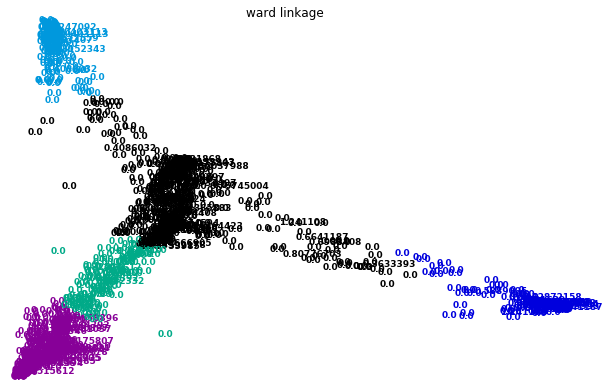

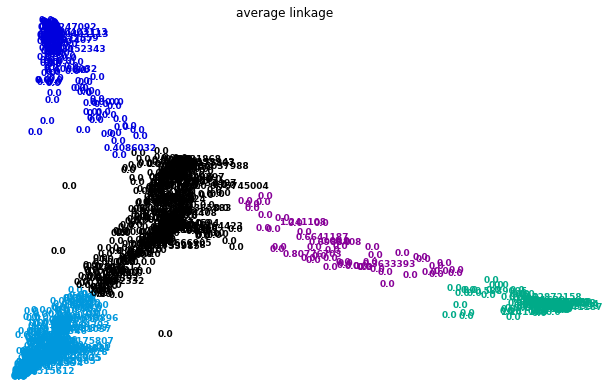

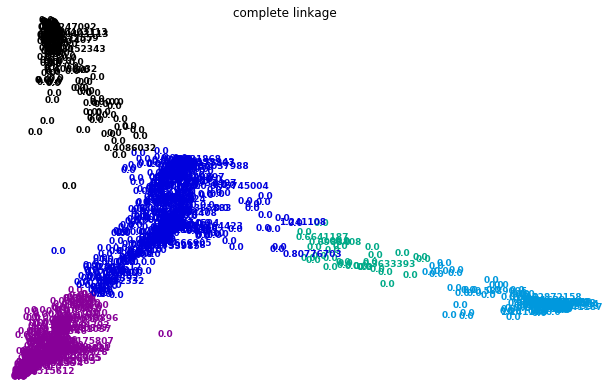

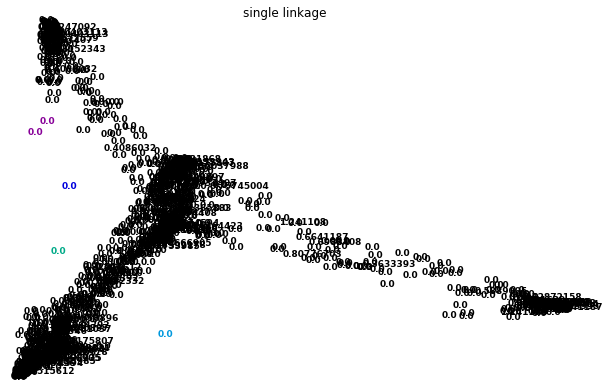

In [32]:
# 2D embedding of the digits dataset
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=5)
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)

plt.show()